# Analysis and Vizualization

The next step is to analyse the results from the different carbon regions. 
After running the experiment, the output folder should look like this.

```
[1]    output 📁
[2]    ├── simple 📁
[3]    │   ├── raw-output 📁
[4]    │   │   |── 0 📁
[5]    │   │   |   └── seed=0 📁
[6]    |   |   |       └── host.parquet 📄
[7]    |   |   |       └── powerSource.parquet 📄
[8]    |   |   |       └── service.parquet 📄
[9]    |   |   |       └── task.parquet 📄
[10]   │   │   |── 1 📁
[11]   │   │   |   └── seed=0 📁
[12]   |   |   |       └── host.parquet 📄
[13]   |   |   |       └── powerSource.parquet 📄
[14]   |   |   |       └── service.parquet 📄
[15]   |   |   |       └── task.parquet 📄
[16]   │   │   |── 2 📁
[17]   │   │   |   └── seed=0 📁
[18]   |   |   |       └── host.parquet 📄
[19]   |   |   |       └── powerSource.parquet 📄
[20]   |   |   |       └── service.parquet 📄
[21]   |   |   |       └── task.parquet 📄
[22]   │   │   |── 3 📁
[23]   │   │   |   └── seed=0 📁
[24]   |   |   |       └── host.parquet 📄
[25]   |   |   |       └── powerSource.parquet 📄
[26]   |   |   |       └── service.parquet 📄
[27]   |   |   |       └── task.parquet 📄
[28]   |   ├── simulation-analysis 📁
[29]   |   └── trackr.json 📄
```

OpenDC has created four output folders in the `raw-output` folder; one for each topology.
Simulations are run in the order that they were defined in the `experiment` file. For this experiment, it means that 0->Belgium, 1->Germany, 2->France, and 3->Netherlands. If you are unsure, you can always use the `trackr.json` file to determine the setup of each simulation. 

To analyse the results, we load the results using Pandas:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_host_BE = pd.read_parquet("output/carbon/raw-output/0/seed=0/host.parquet")
df_powerSource_BE = pd.read_parquet("output/carbon/raw-output/0/seed=0/powerSource.parquet")
df_task_BE = pd.read_parquet("output/carbon/raw-output/0/seed=0/task.parquet")
df_service_BE = pd.read_parquet("output/carbon/raw-output/0/seed=0/service.parquet")

df_host_DE = pd.read_parquet("output/carbon/raw-output/1/seed=0/host.parquet")
df_powerSource_DE = pd.read_parquet("output/carbon/raw-output/1/seed=0/powerSource.parquet")
df_task_DE = pd.read_parquet("output/carbon/raw-output/1/seed=0/task.parquet")
df_service_DE = pd.read_parquet("output/carbon/raw-output/1/seed=0/service.parquet")

df_host_FR = pd.read_parquet("output/carbon/raw-output/2/seed=0/host.parquet")
df_powerSource_FR = pd.read_parquet("output/carbon/raw-output/2/seed=0/powerSource.parquet")
df_task_FR = pd.read_parquet("output/carbon/raw-output/2/seed=0/task.parquet")
df_service_FR = pd.read_parquet("output/carbon/raw-output/2/seed=0/service.parquet")

df_host_NL = pd.read_parquet("output/carbon/raw-output/3/seed=0/host.parquet")
df_powerSource_NL = pd.read_parquet("output/carbon/raw-output/3/seed=0/powerSource.parquet")
df_task_NL = pd.read_parquet("output/carbon/raw-output/3/seed=0/task.parquet")
df_service_NL = pd.read_parquet("output/carbon/raw-output/3/seed=0/service.parquet")


## 5. Plotting results

To understand the effect of the location, we plot several metrics during the workload for each of the topologies.

### Carbon Intensity

Lets first look at the difference between the energy mix used by the different topologies. We can do this by plotting the carbon intensity of each of the datacenters. 

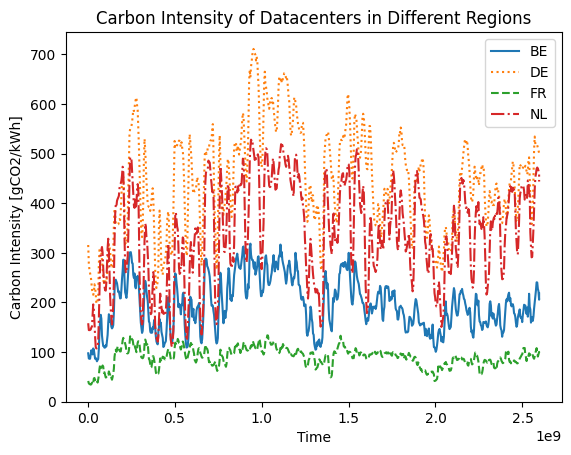

In [2]:
plt.plot(df_powerSource_BE["timestamp"], df_powerSource_BE["carbon_intensity"], label="BE")
plt.plot(df_powerSource_DE["timestamp"], df_powerSource_DE["carbon_intensity"], label="DE", linestyle=':')
plt.plot(df_powerSource_FR["timestamp"], df_powerSource_FR["carbon_intensity"], label="FR", linestyle='--')
plt.plot(df_powerSource_NL["timestamp"], df_powerSource_NL["carbon_intensity"], label="NL", linestyle='-.')

plt.legend()
plt.xlabel("Time")
plt.ylim([0, None])
plt.ylabel("Carbon Intensity [gCO2/kWh]")
plt.title("Carbon Intensity of Datacenters in Different Regions")

plt.show()

We see a significant difference in carbon intensity between the different locations.
The carbon intensity of Germany is up to 10x higher than that of France.

### Power Draw

Next, we look at the power draw of the different datacenters:

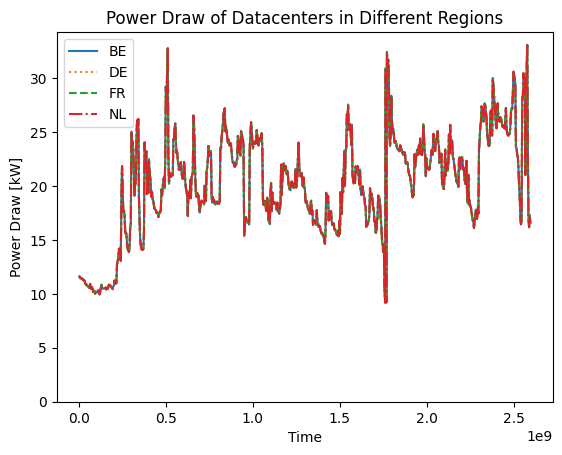

In [3]:
plt.plot(df_powerSource_BE["timestamp"], df_powerSource_BE["power_draw"] / 1000, label="BE")
plt.plot(df_powerSource_DE["timestamp"], df_powerSource_DE["power_draw"] / 1000, label="DE", linestyle=':')
plt.plot(df_powerSource_FR["timestamp"], df_powerSource_FR["power_draw"] / 1000, label="FR", linestyle='--')
plt.plot(df_powerSource_NL["timestamp"], df_powerSource_NL["power_draw"] / 1000, label="NL", linestyle='-.')

plt.legend()
plt.xlabel("Time")
plt.ylim([0, None])
plt.ylabel("Power Draw [kW]")
plt.title("Power Draw of Datacenters in Different Regions")

plt.show()

There is no difference in power draw between the different data centers. 
This is expected since they are running the same workload, using the same hardware. 

### Carbon Emission

Finally, we look at the difference in carbon emission between the different datacenters:

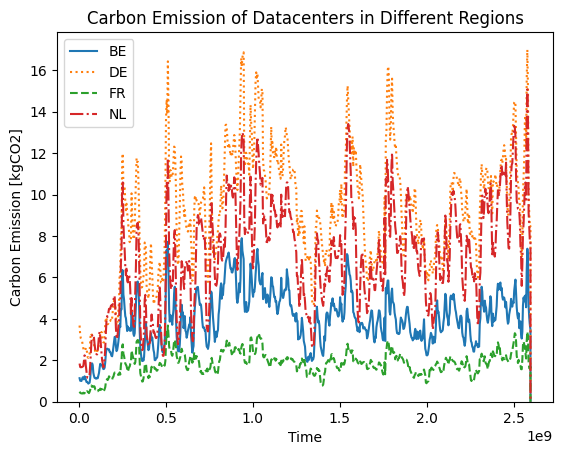

In [4]:
plt.plot(df_powerSource_BE["timestamp"], df_powerSource_BE["carbon_emission"] / 1000, label="BE")
plt.plot(df_powerSource_DE["timestamp"], df_powerSource_DE["carbon_emission"] / 1000, label="DE", linestyle=':')
plt.plot(df_powerSource_FR["timestamp"], df_powerSource_FR["carbon_emission"] / 1000, label="FR", linestyle='--')
plt.plot(df_powerSource_NL["timestamp"], df_powerSource_NL["carbon_emission"] / 1000, label="NL", linestyle='-.')

plt.legend()
plt.xlabel("Time")
plt.ylim([0, None])
plt.ylabel("Carbon Emission [kgCO2]")
plt.title("Carbon Emission of Datacenters in Different Regions")

plt.show()

As expected, the carbon emissions of the datacenters located in low-carbon regions is much lower those located in high-carbon regions. 

## 6. Aggregating results

Finally, we would like to understand the exact differences between the different datacenters over the whole workload. We can do this by aggregating some of the output metrics:


In [5]:
carbon_BE = df_powerSource_BE["carbon_emission"].sum() / 1000
carbon_DE = df_powerSource_DE["carbon_emission"].sum() / 1000
carbon_FR = df_powerSource_FR["carbon_emission"].sum() / 1000
carbon_NL = df_powerSource_NL["carbon_emission"].sum() / 1000

print(f"Total Carbon Emission Belgium:     {carbon_BE:.2f} kgCO2")
print(f"Total Carbon Emission Germany:     {carbon_DE:.2f} kgCO2")
print(f"Total Carbon Emission France:      {carbon_FR:.2f} kgCO2")
print(f"Total Carbon Emission Netherlands: {carbon_NL:.2f} kgCO2\n")

diff = carbon_DE - carbon_FR

print(f"Difference between Germany and France: {diff:.2f} kgCO2")

print(f"Running the workload in Germany instead of France increases carbon {diff/carbon_FR:.2f}x.\n")


Total Carbon Emission Belgium:     2866.14 kgCO2
Total Carbon Emission Germany:     6558.96 kgCO2
Total Carbon Emission France:      1328.81 kgCO2
Total Carbon Emission Netherlands: 5007.38 kgCO2

Difference between Germany and France: 5230.15 kgCO2
Running the workload in Germany instead of France increases carbon 3.94x.

